# Grouping NBA players with similar skillsets
- In this notebook:
    - Feature Scaling
    - Hierarchical Clustering
        - Average Linkage
        - Centroid Linkage
        - Single Linkage
        - Complete Linkage

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import scipy.cluster.hierarchy as sch
from sklearn.preprocessing import MinMaxScaler

In [5]:
df = pd.read_csv('nba.csv')

df.head()

,NAME,Pos,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,...,FT%,FTA,ORB,PF,PTS,STL,TOV,TRB,PPG,SALARY
0,Jaylen Adams,PG,428,7.6,0.474,0.673,0.082,2.6,12.3,7.4,...,0.778,9.0,11.0,45.0,108.0,14.0,28.0,60.0,3.2,270014
1,Steven Adams,C,2669,18.5,0.591,0.002,0.361,14.7,14.8,14.7,...,0.500,292.0,391.0,204.0,1108.0,117.0,135.0,760.0,13.8,24157303
2,Bam Adebayo,C,1913,17.9,0.623,0.031,0.465,9.2,24.0,16.6,...,0.735,226.0,165.0,203.0,729.0,71.0,121.0,597.0,8.9,2955840
3,LaMarcus Aldridge,C,2687,22.9,0.576,0.032,0.312,10.3,19.8,15.1,...,0.847,412.0,251.0,179.0,1727.0,43.0,144.0,744.0,21.3,22347015
4,Grayson Allen,SG,416,7.5,0.516,0.556,0.337,0.8,5.1,3.0,...,0.750,60.0,3.0,47.0,211.0,6.0,33.0,23.0,5.6,2074320


In [6]:
# Top 100 players according to average PPG
df_sorted = df.sort_values(by='PPG',ascending=False)
df_sorted = df_sorted.head(100)
names = df_sorted['NAME'].tolist()

In [7]:
# Normalizing the data
scaler = MinMaxScaler()

X = df_sorted.drop(['Pos','NAME'],axis=1)
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled)

# Hierarchical Clustering

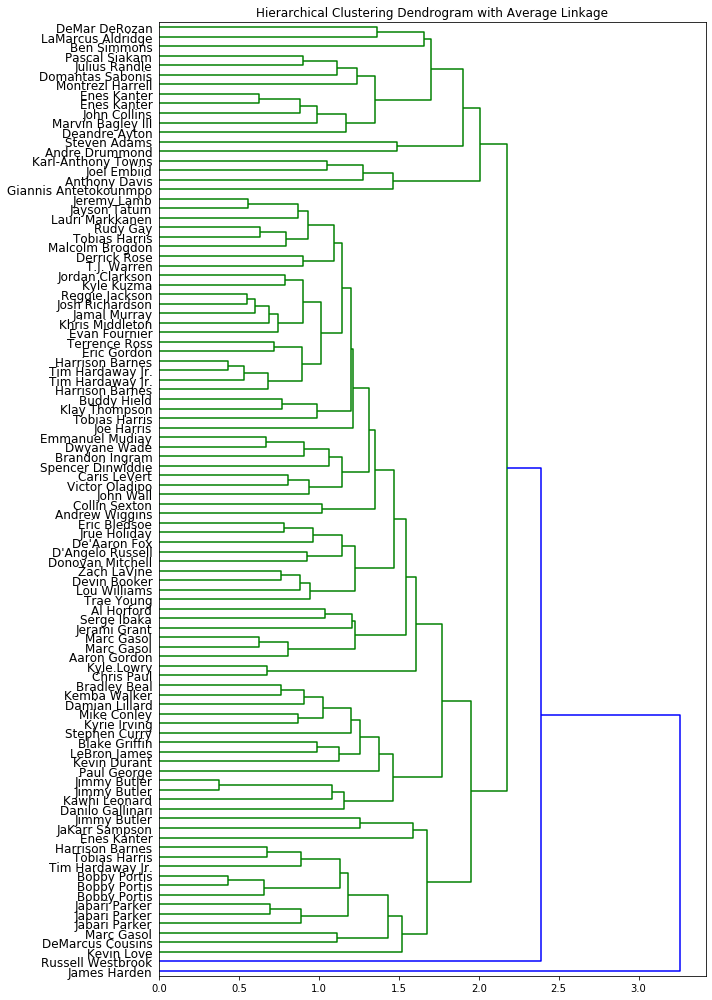

In [16]:
# plot dendrogram using average linkage
plt.figure(figsize=(10,14))
plt.title('Hierarchical Clustering Dendrogram with Average Linkage')

dendrogram = sch.dendrogram(sch.linkage(X_scaled, method="average"), labels= names, leaf_font_size = 12, orientation='right')
plt.tight_layout()

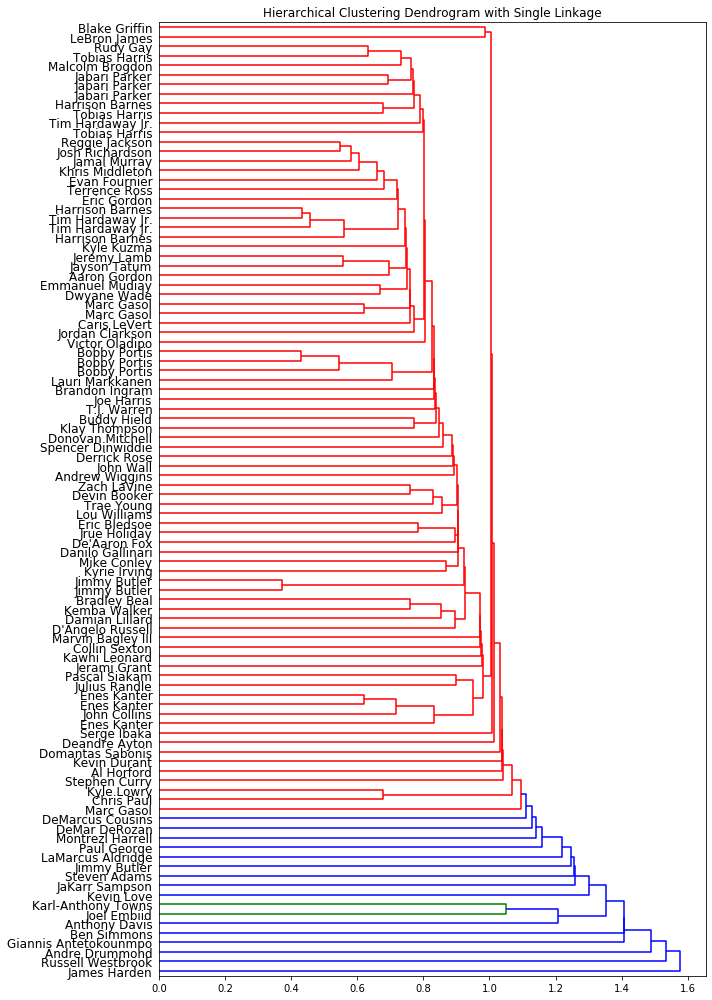

In [18]:
# plot dendrogram using single linkage
plt.figure(figsize=(10,14))
plt.title('Hierarchical Clustering Dendrogram with Single Linkage')

dendrogram = sch.dendrogram(sch.linkage(X_scaled, method="single"), labels= names, leaf_font_size = 12, orientation='right')
plt.tight_layout()

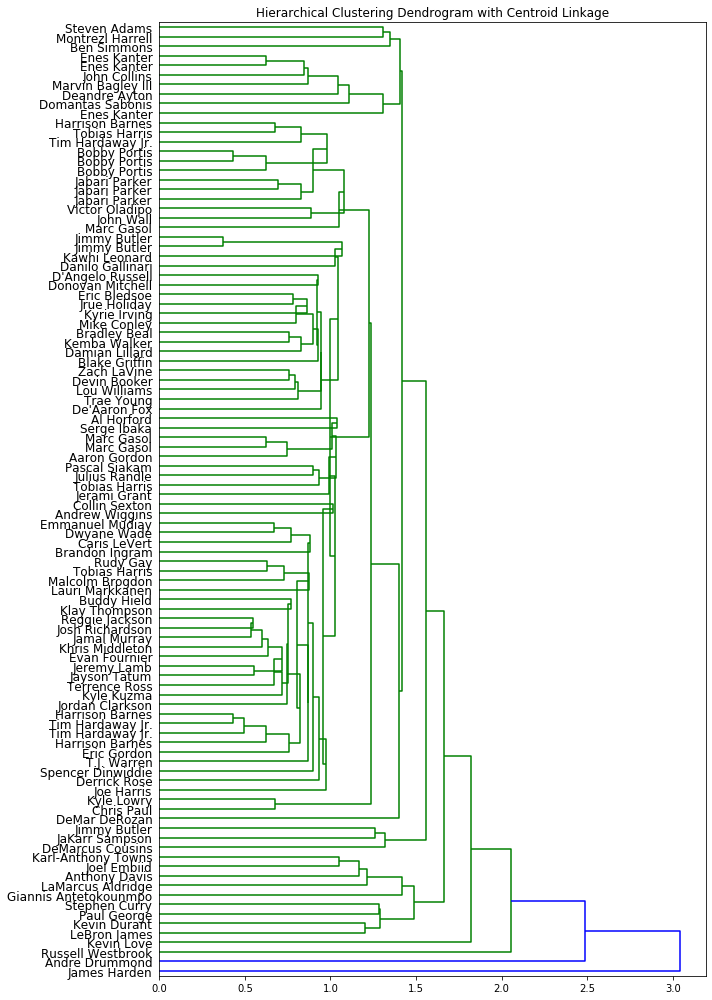

In [19]:
# plot dendrogram using centroid linkage
plt.figure(figsize=(10,14))
plt.title('Hierarchical Clustering Dendrogram with Centroid Linkage')

dendrogram = sch.dendrogram(sch.linkage(X_scaled, method="centroid"), labels= names, leaf_font_size = 12, orientation='right')
plt.tight_layout()

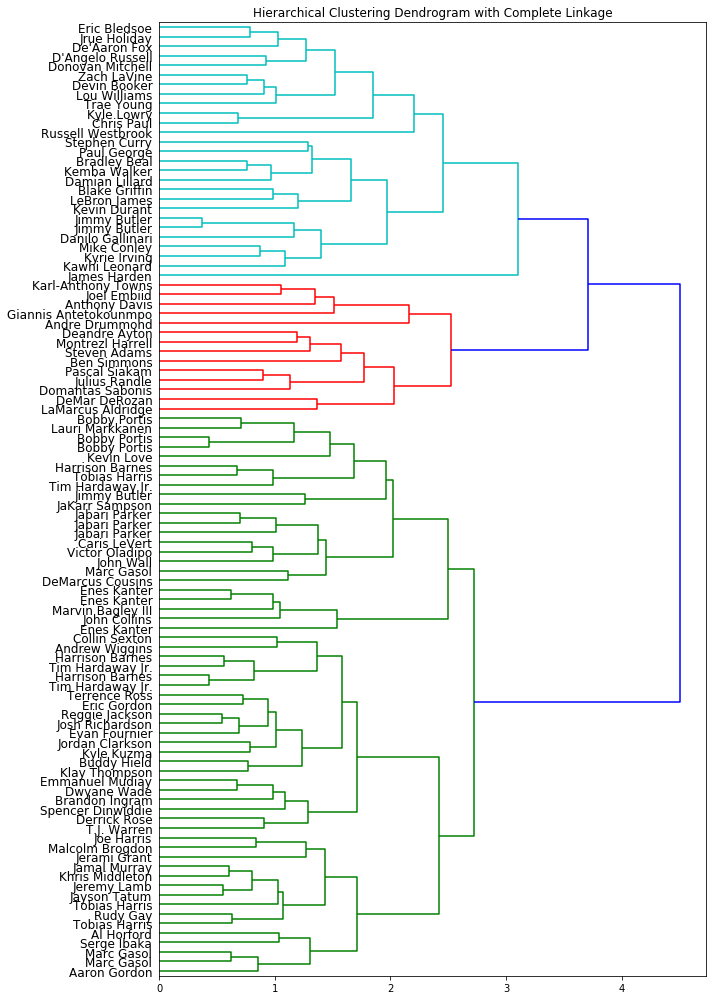

In [20]:
# plot dendrogram using complete linkage
plt.figure(figsize=(10,14))
plt.title('Hierarchical Clustering Dendrogram with Complete Linkage')

dendrogram = sch.dendrogram(sch.linkage(X_scaled, method="complete"), labels= names, leaf_font_size = 12, orientation='right')
plt.tight_layout()